# Linear Regression Lab

### Part 1: Load  data

Import "mtcars.csv"

In [1]:
import pandas as pd
mtcars = pd.read_csv('mtcars.csv', index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


### Part 2: Preprocess data

#### 2.1 Pairwise correlation

In [3]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [4]:
import matplotlib.pyplot as plt

plt.scatter(mtcars.wt,mtcars.mpg)
print(mtcars.wt.corr(mtcars.mpg))

-0.8676593765172279


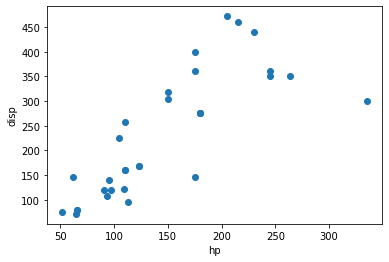

0.7909485863698065


In [5]:
# correlation between "hp" and "disp"

plt.scatter(mtcars['hp'], mtcars['disp'])
plt.xlabel('hp')
plt.ylabel('disp')
plt.show()
print(mtcars['hp'].corr(mtcars['disp']))

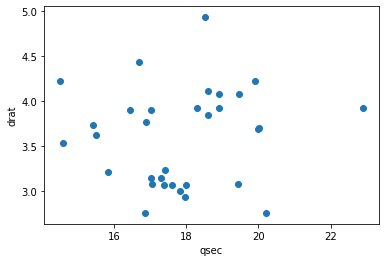

0.09120475965118297


In [6]:
# correlation between "qsec" and "drat"

plt.scatter(mtcars['qsec'], mtcars['drat'])
plt.xlabel('qsec')
plt.ylabel('drat')
plt.show()
print(mtcars['qsec'].corr(mtcars['drat']))

#### 2.2 Train/Test separation

Perform hold-out method
- 60% training set
- 40% testing set

In [7]:
# The mtcars dataset is too small. No need the train/test separation.

##### X/y separation

In [8]:
y = mtcars['mpg']
X = mtcars[['wt']]

### Part 3: Train linear regression models

Using scikit-learn

In [9]:
# wt vs mpg

from sklearn import linear_model as lm

model = lm.LinearRegression()
results = model.fit(X,y)

print(model.intercept_, model.coef_)

37.28512616734204 [-5.34447157]


### Part 4: Model Evaluation

In [10]:
y_pred = model.predict(X)
y_error = y - y_pred

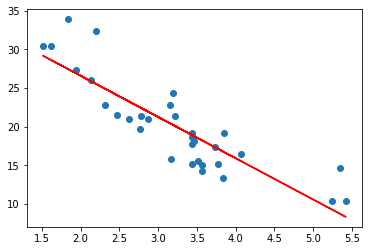

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [12]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.7528327936582646

## Alternative training method (Part 3 & 4)

Using statsmodels

In [13]:
import statsmodels.api as sm

model2 = sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              79.58
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                    4.55e-10
Time:                        00:22:48   Log-Likelihood:                         -122.40
No. Observations:                  32   AIC:                                      246.8
Df Residuals:                      31   BIC:                                      248.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             5.2916      0.593      8.921      0.000       4.082       6.501
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.317
Skew:                           0.189   Prob(JB):                        0.854
Kurtosis:                       2.692   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
Xc = sm.add_constant(X)
model3 = sm.OLS(y,Xc).fit()
model3.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.29e-10
Time:                        00:22:48   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple linear regression lab

Try building models with others parameters

#### Descripton:
The below linear regression model is the model used to predict the oil consumption of particular car (mpg) by using the volume of car's displacement (disp) to be the factor of prediction (this pair of feature and label was selected by selection the pair of high correlation features). 

In [15]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [16]:
# select feature and label
feature = mtcars[['disp']]
label = mtcars['mpg']

lnr = lm.LinearRegression()
lnr.fit(feature, label)

print("intercept:",lnr.intercept_,"\ncoef:", lnr.coef_)

pred = lnr.predict(feature)

print("r2:",r2_score(label, pred))

intercept: 29.59985475616395 
coef: [-0.04121512]
r2: 0.7183433404897299


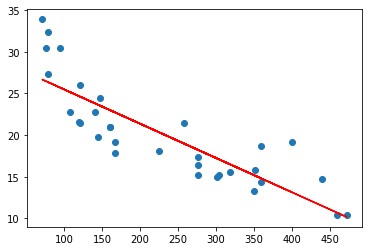

In [17]:
plt.scatter(mtcars['disp'],mtcars['mpg'])
plt.plot(feature, pred, color='red')

#### Result:
The result is quite satisfactory since the r-square of model is about 0.7 and as the above plotted graph, it indicates that the model can follow the trend of data points correlation. 

## Multiple Linear Regression

In [18]:
# Multiple regression additive model
X1 = mtcars
Xc = sm.add_constant(X1)

m_model = sm.OLS(y,Xc[['wt','hp']]).fit()
m_model.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              39.83
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                    3.60e-09
Time:                        00:22:48   Log-Likelihood:                         -122.01
No. Observations:                  32   AIC:                                      248.0
Df Residuals:                      30   BIC:                                      251.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             6.8404      1.894      3.611      0.001       2.972      10.709
hp            -0.0339      0.039     -0.861      0.396      -0.114       0.047
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.044
Skew:                           0.090   Prob(JB):                        0.978
Kurtosis:                       2.994   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Adding interaction term
Xc['hp:wt'] = Xc['hp']*X1['wt']
Xc.head()

,const,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp:wt
model,,,,,,,,,,,,,
Mazda RX4,1.0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,288.20
Mazda RX4 Wag,1.0,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,316.25
Datsun 710,1.0,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,215.76
Hornet 4 Drive,1.0,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,353.65
Hornet Sportabout,1.0,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,602.00


In [20]:
m_model2 = sm.OLS(y,Xc[['wt','hp','hp:wt']]).fit()
m_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              124.2
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                    1.20e-16
Time:                        00:22:48   Log-Likelihood:                         -100.71
No. Observations:                  32   AIC:                                      207.4
Df Residuals:                      29   BIC:                                      211.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             8.5761      1.009      8.503      0.000       6.513      10.639
hp             0.1818      0.032      5.750      0.000       0.117       0.246
hp:wt         -0.0675      0.008     -8.991      0.000      -0.083      -0.052
==============================================================================
Omnibus:                        6.403   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.617
Skew:                           1.026   Prob(JB):                       0.0603
Kurtosis:                       3.068   Cond. No.                         613.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multi regression model (using sm.OLS method)
<b>Description:</b> this model is using 'hp' and 'disp' as interactive features and 'mpg' as label

In [23]:
# Multiple regression additive model
X2 = mtcars
Xc2 = sm.add_constant(X2)

# Adding interaction term
Xc2['hp:disp'] = Xc2['hp']*X2['disp']
Xc2.head()

m_model3 = sm.OLS(y,Xc2[['disp','hp','hp:disp']]).fit()
m_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              78.15
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                    5.31e-14
Time:                        00:31:10   Log-Likelihood:                         -107.45
No. Observations:                  32   AIC:                                      220.9
Df Residuals:                      29   BIC:                                      225.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0920      0.021      4.405      0.000       0.049       0.135
hp             0.2046      0.030      6.922      0.000       0.144       0.265
hp:disp       -0.0008   9.28e-05     -8.605      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.551   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.598
Skew:                           0.820   Prob(JB):                        0.166
Kurtosis:                       3.100   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### statsmodels.formula

In [21]:
import statsmodels.formula.api as smf
model_01 = smf.ols(formula='mpg ~ wt + hp', data=mtcars).fit()
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           9.11e-12
Time:                        00:22:48   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as smf
model_01 = smf.ols(formula='mpg ~ wt * hp', data=mtcars).fit()
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.98e-13
Time:                        00:22:48   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt:hp          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Multi regression model (using sm.formular method)
<b>Description:</b> this model is using 'hp' and 'disp' as interactive features and 'mpg' as label

In [31]:
import statsmodels.formula.api as smf
model_02 = smf.ols(formula='mpg ~ disp + hp', data=mtcars).fit()
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           2.06e-09
Time:                        00:37:40   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7359      1.332     23.083      0.000      28.013      33.459
disp          -0.0303      0.007     -4.098      0.000      -0.045      -0.015
hp            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.formula.api as smf
model_03 = smf.ols(formula='mpg ~ disp * hp', data=mtcars).fit()
model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     42.48
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.50e-10
Time:                        00:37:43   Log-Likelihood:                -74.954
No. Observations:                  32   AIC:                             157.9
Df Residuals:                      28   BIC:                             163.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6743      2.914     13.614      0.000      33.705      45.644
disp          -0.0734      0.014     -5.100      0.000      -0.103      -0.044
hp            -0.0979      0.025     -3.956      0.000      -0.149      -0.047
disp:hp        0.0003   8.69e-05      3.336      0.002       0.000       0.000
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.579
Skew:                           0.814   Prob(JB):                        0.167
Kurtosis:                       2.820   Cond. No.                     3.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""